In [62]:
import healpy as hp
import numpy as np
from mocpy import MOC
import cdshealpix
from healpy.rotator import Rotator

In [63]:
# map must be 
m = hp.read_map('lambda_sfd_ebv.fits', nest=False)

r = Rotator(coord=['G','C'])
# as far as I can see, rotate_map_pixel only works on RING maps, hence nest=False above
m_equatorial_ring = r.rotate_map_pixel(m)
# now we can reorder to NESTED scheme
m_equatorial = hp.reorder(m_equatorial_ring, r2n=True)

nside = 512
norder = hp.nside2order(nside)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/Users/thomas/miniconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/Users/thomas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.FileIO name='lambda_sfd_ebv.fits' mode='rb' closefd=True>
  


In [64]:
indexes_pixels_to_keep = np.where((m_equatorial<0.5) & (m_equatorial>0.0))[0]
len(indexes_pixels_to_keep)

2728504

In [65]:
moc = MOC.from_healpix_cells(indexes_pixels_to_keep, np.full((len(indexes_pixels_to_keep,)), norder))

In [66]:
moc.sky_fraction

0.8673680424690247

/Users/thomas/miniconda3/lib/python3.6/site-packages/mocpy/moc/moc.py:722: DeprecationWarning: This method is deprecated and is no longer tested.Please refer to this documentation page for plotting MOCs usingmatplotlib: https://mocpy.readthedocs.io/en/latest/examples/examples.html#loading-and-plotting-the-moc-of-sdss
  'matplotlib: https://mocpy.readthedocs.io/en/latest/examples/examples.html#loading-and-plotting-the-moc-of-sdss', DeprecationWarning)


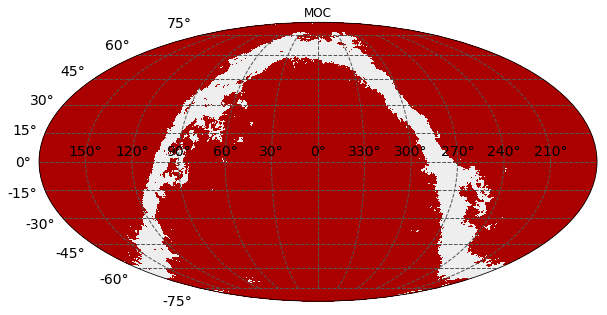

In [67]:
moc.plot()

In [68]:
moc.write('foobar.fits', overwrite=True)